# Machine Learning - Practical I

Names: Tapashi Gosswami, Eliza Nyambu, Kani Kadir

This notebook provides you with the assignments and the overall code structure you need to complete the assignment. There are also questions that you need to answer in text form. Please use full sentences and reasonably correct spelling/grammar.

Regarding submission & grading:

- Work in groups of two or three and hand in your solution as a group.

- Solutions need to be uploaded to StudIP until the submission date indicated in the course plan. Please upload a copy of this notebook and a PDF version of it after you ran it.

- Solutions need to be presented to tutors in tutorial. Presentation dates are listed in the course plan. Every group member needs to be able to explain everything.

- You have to solve N-1 exercise of each practical to get admission to the exam.

- For plots you create yourself, all axes must be labeled. 

- Do not change the function interfaces.
    
    

In [1]:
# %matplotlib notebook
%matplotlib inline

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat
from scipy import stats
import copy
import pylab
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

## The  dataset

In [2]:
data=pd.read_csv('superconduct_train.csv')
print(data.shape)

(21263, 82)


In [3]:
data.head(100)

number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0                    4         88.944468             57.862692   
1                    5         92.729214             58.518416   
2                    4         88.944468             57.885242   
3                    4         88.944468             57.873967   
4                    4         88.944468             57.840143   
..                 ...               ...                   ...   
95                   4         76.444563             51.245665   
96                   4         95.450680             54.158394   
97                   5         92.605650             53.121628   
98                   4         76.444563             51.245665   
99                   4         76.444563             51.245665   

    gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
0           66.361592              36.116612             1.181795   
1           73.132787              36.396602             1.449309   
2           66.361592              36.122509             1.181795   
3           66.361592              36.119560             1.181795   
4           66.361592              36.110716             1.181795   
..                ...                    ...                  ...   
95          59.356672              34.935266             1.199541   
96          69.272696              34.530877             1.161763   
97          72.126319              34.273569             1.432940   
98          59.356672              34.935266             1.199541   
99          59.356672              34.935266             1.199541   

    wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  \
0                  1.062396          122.90607              31.794921   
1                  1.057755          122.90607              36.161939   
2                  0.975980          122.90607              35.741099   
3                  1.022291          122.90607              33.768010   
4                  1.129224          122.90607              27.848743   
..                      ...                ...                    ...   
95                 1.291888          121.32760              14.288319   
96                 1.347089          148.93092              10.475629   
97                 1.388317          141.25060              18.983101   
98                 1.291888          121.32760              14.288319   
99                 1.291888          121.32760              14.288319   

    std_atomic_mass  ...  wtd_mean_Valence  gmean_Valence  wtd_gmean_Valence  \
0         51.968828  ...          2.257143       2.213364           2.219783   
1         47.094633  ...          2.257143       1.888175           2.210679   
2         51.968828  ...          2.271429       2.213364           2.232679   
3         51.968828  ...          2.264286       2.213364           2.226222   
4         51.968828  ...          2.242857       2.213364           2.206963   
..              ...  ...               ...            ...                ...   
95        43.823354  ...          2.076923       2.213364           2.063362   
96        58.973428  ...          2.071429       2.213364           2.058771   
97        50.804646  ...          2.071429       2.352158           2.058771   
98        43.823354  ...          2.076923       2.213364           2.063362   
99        43.823354  ...          2.076923       2.213364           2.063362   

    entropy_Valence  wtd_entropy_Valence  range_Valence  wtd_range_Valence  \
0          1.368922             1.066221              1           1.085714   
1          1.557113             1.047221              2           1.128571   
2          1.368922             1.029175              1           1.114286   
3          1.368922             1.048834              1           1.100000   
4          1.368922             1.096052              1           1.057143   
..              ...                  ...            ...                ...  

Because the dataset is rather large, we prepare a small subset of the data as training set, and another subset as test set. To make the computations reproducible, we set the random seed.

In [4]:
target_clm = 'critical_temp' # the critical temperature is our target variable
n_trainset = 200 # size of the training set
n_testset = 500 #size of the test set

In [5]:
# set random seed to make sure every test set is the same
np.random.seed(seed=1)

idx = np.arange(data.shape[0])
idx_shuffled = np.random.permutation(idx) # shuffle indices to split into training and test set

test_idx = idx_shuffled[:n_testset]
train_idx = idx_shuffled[n_testset:n_testset+n_trainset]
train_full_idx = idx_shuffled[n_testset:]

X_test = data.loc[test_idx, data.columns != target_clm].values
y_test = data.loc[test_idx, data.columns == target_clm].values
print('Test set shapes (X and y)', X_test.shape, y_test.shape)

X_train = data.loc[train_idx, data.columns != target_clm].values
y_train = data.loc[train_idx, data.columns == target_clm].values
print('Small training set shapes (X and y):',X_train.shape, y_train.shape)

X_train_full = data.loc[train_full_idx, data.columns != target_clm].values
y_train_full = data.loc[train_full_idx, data.columns == target_clm].values
print('Full training set shapes (X and y):',X_train_full.shape, y_train_full.shape)

Test set shapes (X and y) (500, 81) (500, 1)
Small training set shapes (X and y): (200, 81) (200, 1)
Full training set shapes (X and y): (20763, 81) (20763, 1)


## Task 1: Plot the dataset

To explore the dataset, use `X_train_full` and `y_train_full` for two descriptive plots:

* **Histogram** of the target variable. Use `plt.hist`.

* **Scatterplots** relating the target variable to one of the feature values. For this you will need 81 scatterplots. Arrange them in one big figure with 9x9 subplots. Use `plt.scatter`. You may need to adjust the marker size and the alpha blending value. 

Text(0, 0.5, 'Frequency')

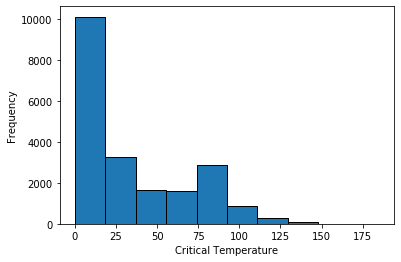

In [6]:
# Histogram of the target variable
plt.hist(y_train_full, edgecolor = 'black')
plt.xlabel('Critical Temperature')
plt.ylabel('Frequency')

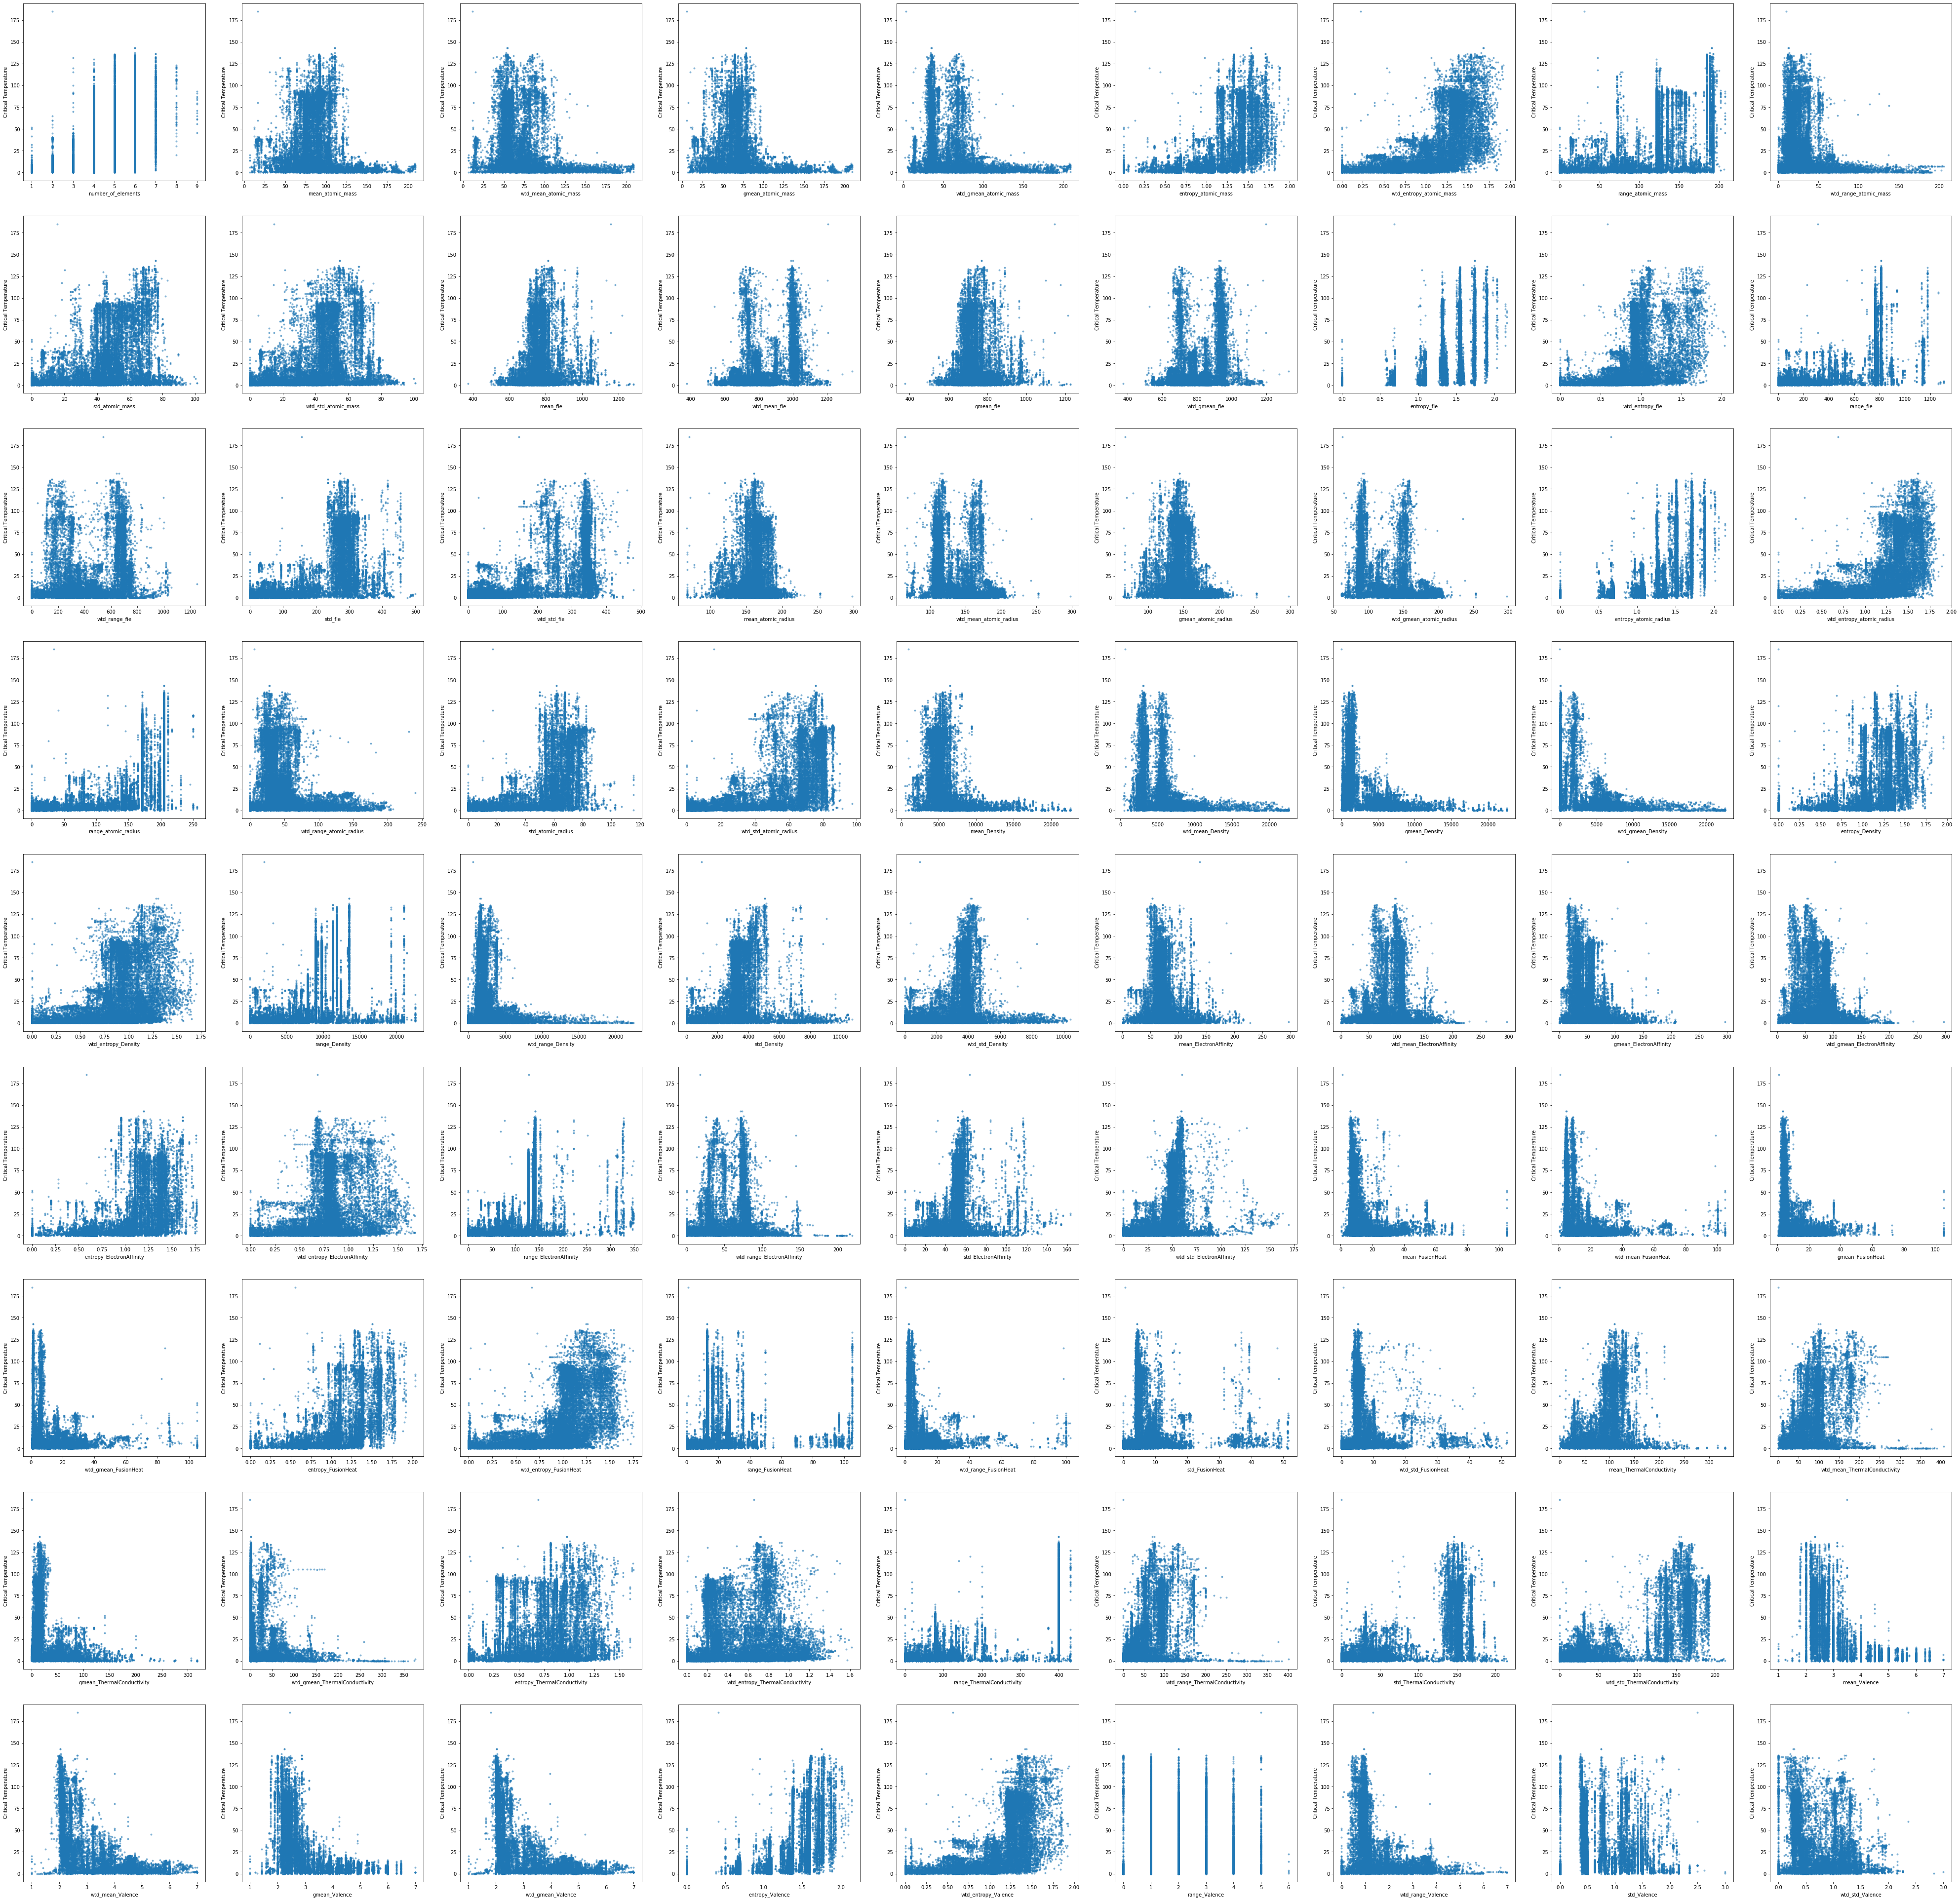

In [7]:
# Scatter plots of the target variable vs. features

#for x in range(1,82):
#    plt.figure(figsize=(50,50))
#    plt.subplot(9,9,x)
#    plt.scatter(X_train_full[:,x-1], y_train_full, marker=".", alpha=0.5)
    
fig,axs = plt.subplots(9,9,figsize =(70,70))
p = 0
q = 0
for x in range(1,82):
    axs[p,q].scatter(X_train_full[:,x-1], y_train_full, marker=".", alpha=0.5)
    axs[p,q].set(xlabel = data.columns[x-1],ylabel = 'Critical Temperature')
    q = q+1
    if x%9 == 0:
        p = p+1
        q = 0

Which material properties may be useful for predicting superconductivity? What other observations can you make?

YOUR ANSWER HERE:

From the scatter plots, we found the following information for predicting superconductivity:
 
1.gmean_Density: There is a strong negative non linear relationship between gmean_Density and critical_temp. When gmean_Density increases gradually, critical_temp decreases. There are very few outliers.

2.wtd_gmean_Density: There is a strong negative non linear relationship between wtd_gmean_Density and critical_temp.

3.wtd_mean_Valence and wtd_gmean_Density: Both have a moderate non linear correlation with critical_temp. They also have some outliers.

4.mean_Valence: The correlation with critical_temp looks like a nonlinear curve with very little outliers.

5.wtd_std_ThermalConductivity and range_ThermalConductivity have a positive relationship with critical_temp but cannot represent any linear or non-linear relationships.

## Task 2:  Implement your own OLS estimator

We want to use linear regression to predict the critical temperature. Implement the ordinary least squares estimator without regularization 'by hand':

$w = (X^TX)^{-1}X^Ty$

To make life a bit easier, we provide a function that can be used to plot regression results. In addition it computes the mean squared error and the squared correlation between the true and predicted values. 

In [8]:
def plot_regression_results(y_test,y_pred,weights):
    '''Produces three plots to analyze the results of linear regression:
        -True vs predicted
        -Raw residual histogram
        -Weight histogram
        
    Inputs:
        y_test: (n_observations,) numpy array with true values
        y_pred: (n_observations,) numpy array with predicted values
        weights: (n_weights) numpy array with regression weights'''
    
    print('MSE: ', mean_squared_error(y_test,y_pred))
    print('r^2: ', r2_score(y_test,y_pred))
    
    fig,ax = plt.subplots(1,3,figsize=(9,3))
    #predicted vs true
    ax[0].scatter(y_test,y_pred)
    ax[0].set_title('True vs. Predicted')
    ax[0].set_xlabel('True %s' % (target_clm))
    ax[0].set_ylabel('Predicted %s' % (target_clm))

    #residuals
    error = np.squeeze(np.array(y_test)) - np.squeeze(np.array(y_pred))
    ax[1].hist(np.array(error),bins=30)
    ax[1].set_title('Raw residuals')
    ax[1].set_xlabel('(true-predicted)')

    #weight histogram
    ax[2].hist(weights,bins=30)
    ax[2].set_title('weight histogram')

    plt.tight_layout()

As an example, we here show you how to use this function with random data. 

MSE:  2640.432578444892
r^2:  -1.108062856115481


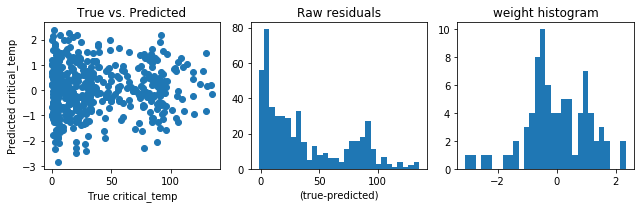

In [9]:
# weights is a vector of length 82: the first value is the intercept (beta0), then 81 coefficients
weights = np.random.randn(82)

# Model predictions on the test set
y_pred_test = np.random.randn(y_test.size)

plot_regression_results(y_test, y_pred_test, weights)

Implement OLS linear regression yourself. Use `X_train` and `y_train` for estimating the weights and compute the MSE and $r^2$ from `X_test`. When you call our plotting function with the regession result, you should get mean squared error of 599.7.

MSE:  599.7397626177568
r^2:  0.5211810643335478


(array([ 2.33570091e+01, -1.75525542e+01,  3.25121613e+00, -3.14782541e+00,
        -2.90331004e+00,  2.94256622e+00, -5.66893270e+01,  8.31690963e+01,
         1.87393905e-01,  1.86365909e-01, -1.48690329e+00,  1.09310487e+00,
        -2.15178587e+00,  2.58783810e+00,  2.08546988e+00, -2.59979040e+00,
         4.05606770e+02,  1.40994831e+02,  3.10938714e-01,  4.81860102e-02,
        -1.64123695e-01, -5.73110759e-01,  2.79926605e+00, -5.79451467e+00,
        -2.74564411e+00,  5.98143713e+00, -2.28561846e+02, -8.22277978e+01,
        -4.94763099e-01, -5.00110272e-01, -3.01222136e-01,  2.03597977e+00,
        -8.69530462e-03,  8.96520289e-03,  9.27270822e-03, -9.46714997e-03,
        -2.84630771e+01, -4.69115892e+01, -2.86864986e-04,  8.57683821e-04,
         8.88577540e-03, -1.31561372e-02, -9.72669239e-01,  1.70607392e+00,
         7.18036812e-01, -1.43680214e+00, -2.59892681e+00,  1.29337617e+00,
        -5.92067168e-01, -2.66375582e-01,  1.99347959e+00, -8.20909164e-01,
         2.2

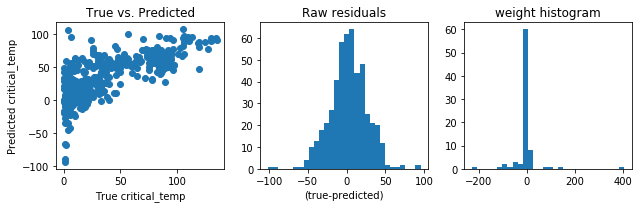

In [15]:
import statsmodels.api as sm
def OLS_regression(X_test, X_train, y_train):
    '''Computes OLS weights for linear regression without regularization on the training set and 
       returns weights and testset predictions.
    
       Inputs:
         X_test: (n_observations, 81), numpy array with predictor values of the test set 
         X_train: (n_observations, 81), numpy array with predictor values of the training set
         y_train: (n_observations,) numpy array with true target values for the training set
         
       Outputs:
         weights: The weight vector for the regerssion model including the offset
         y_pred: The predictions on the TEST set
         
       Note:
         Both the training and the test set need to be appended manually by a columns of 1s to add
         an offset term to the linear regression model.        
    
    '''
    
    # ---------------- INSERT CODE ----------------------
    X_train_con = sm.add_constant(X_train)
    X_test_con = sm.add_constant(X_test)
    model=sm.OLS(y_train,X_train_con)
    results = model.fit()
    weights=results.params
    y_pred=results.predict(X_test_con)
    plot_regression_results(y_test, y_pred, weights)
    # ---------------- END CODE -------------------------
    
    return weights, y_pred
OLS_regression(X_test, X_train, y_train)

What do you observe? Is the linear regression model good?

YOUR ANSWER HERE:

The r^2 value indicates that the model explains almost 52% variability of the response data around its mean. This means, the prediction is not so great.

The residuals are evenly distributed around zero with a range from -50 to +50 which indicates that the random error is normally distruted. However, it would be better if the range would be smaller.
    
The linear regression model is fine but it does not give an outstanding performance.

## Task 3: Compare your implementation to sklearn

Now, familarize yourself with the sklearn library. In the section on linear models:

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

you will find `sklearn.linear_model.LinearRegression`, the `sklearn` implementation of the OLS estimator. Use this sklearn class to implement OLS linear regression. Again obtain estimates of the weights on `X_train` and `y_train` and compute the MSE and $r^2$ on `X_test`.


In [16]:
from sklearn.linear_model import LinearRegression
def sklearn_regression(X_test, X_train, y_train):
    '''Computes OLS weights for linear regression without regularization using the sklearn library on the training set and 
       returns weights and testset predictions.
    
       Inputs:
         X_test: (n_observations, 81), numpy array with predictor values of the test set 
         X_train: (n_observations, 81), numpy array with predictor values of the training set
         y_train: (n_observations,) numpy array with true target values for the training set
         
       Outputs:
         weights: The weight vector for the regerssion model including the offset
         y_pred: The predictions on the TEST set
          
         
       Note:
         The sklearn library automatically takes care of adding a column for the offset.     
    
    '''
    
    # ---------------- INSERT CODE ----------------------
    
    reg = LinearRegression().fit(X_train, y_train)
    weights=reg.coef_
    y_pred=reg.predict(X_test)
    
    # ---------------- END CODE -------------------------
    
    return weights, y_pred
sklearn_regression(X_test, X_train, y_train)

(array([[-1.75525542e+01,  3.25121613e+00, -3.14782541e+00,
         -2.90331004e+00,  2.94256622e+00, -5.66893270e+01,
          8.31690963e+01,  1.87393905e-01,  1.86365909e-01,
         -1.48690329e+00,  1.09310487e+00, -2.15178587e+00,
          2.58783810e+00,  2.08546988e+00, -2.59979040e+00,
          4.05606770e+02,  1.40994831e+02,  3.10938714e-01,
          4.81860102e-02, -1.64123695e-01, -5.73110759e-01,
          2.79926605e+00, -5.79451467e+00, -2.74564411e+00,
          5.98143713e+00, -2.28561846e+02, -8.22277978e+01,
         -4.94763099e-01, -5.00110272e-01, -3.01222136e-01,
          2.03597977e+00, -8.69530462e-03,  8.96520289e-03,
          9.27270822e-03, -9.46714997e-03, -2.84630771e+01,
         -4.69115892e+01, -2.86864986e-04,  8.57683821e-04,
          8.88577540e-03, -1.31561372e-02, -9.72669239e-01,
          1.70607392e+00,  7.18036812e-01, -1.43680214e+00,
         -2.59892681e+00,  1.29337617e+00, -5.92067168e-01,
         -2.66375582e-01,  1.99347959e+0

MSE:  599.7397626178031
r^2:  0.521181064333511


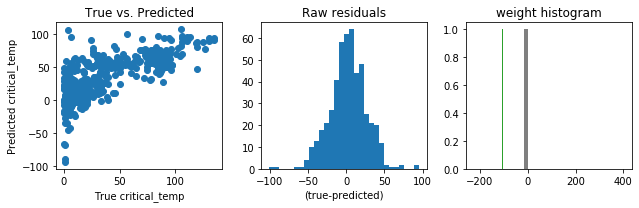

In [17]:
weights, y_pred = sklearn_regression(X_test, X_train, y_train)
plot_regression_results(y_test, y_pred, weights)

If you implemented everything correctly, the MSE is again 599.74.

Fit the model using the larger training set, `X_train_full` and `y_train_full`, and again evaluate on `X_test`.

MSE:  329.8607010410474
r^2:  0.7366465263179004


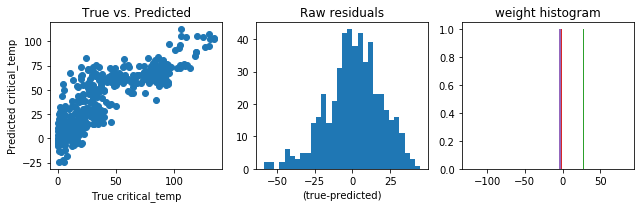

In [18]:
weights, y_pred = sklearn_regression(X_test, X_train_full, y_train_full)
plot_regression_results(y_test, y_pred, weights)

 How does test set performance change? What else changes?

YOU ANSWER HERE: 

The MSE decreases and the r^2 increases which means the model performs better. The r^2 value indicates that now, the model explains almost 74% of variability of the response data around its mean. The residuals are evenly distributed around zero with a range from -25 to +25. The range is now smaller than the previous one.

## Task 4: Regularization with ridge regression

We will now explore how a penalty term on the weights can improve the prediction quality for finite data sets. Implement the analytical solution of ridge regression 

$w = (XX^T + \alpha I_D)^{-1}X^Ty$


as a function that can take different values of $\alpha$, the regularization strength, as an input. In the lecture, this parameter was called $\lambda$, but this is a reserved keyword in Python.

In [19]:
from sklearn.linear_model import Ridge
from numpy import linalg

def ridge_regression(X_test, X_train, y_train, alpha):
    '''Computes OLS weights for regularized linear regression with regularization strength alpha 
       on the training set and returns weights and testset predictions.
    
       Inputs:
         X_test: (n_observations, 81), numpy array with predictor values of the test set 
         X_train: (n_observations, 81), numpy array with predictor values of the training set
         y_train: (n_observations,) numpy array with true target values for the training set
         alpha: scalar, regularization strength
         
       Outputs:
         weights: The weight vector for the regerssion model including the offset
         y_pred: The predictions on the TEST set
          
       Note:
         Both the training and the test set need to be appended manually by a columns of 1s to add
         an offset term to the linear regression model.       
    
    '''

    # ---------------- INSERT CODE ----------------------
    X_train_con2 = sm.add_constant(X_train)
    X_test_con2 = sm.add_constant(X_test)
    
    X_train_con2=np.matrix(X_train_con2)
    y_train=np.matrix(y_train).transpose()
    XTX = X_train_con2.transpose()*X_train_con2
    XTY = X_train_con2.transpose()*y_train.transpose()
    LI = alpha*np.matrix(np.identity(len(XTX)))
    LI[0,0]=0
    weights = linalg.inv(XTX+LI)*XTY
    y_pred = np.dot(X_test_con2,weights)
    # ---------------- END CODE -------------------------
        
    return weights, y_pred
ridge_regression(X_test, X_train, y_train, 1.0)

(matrix([[-1.83652333e+01],
         [-8.51357416e+00],
         [ 2.99038057e+00],
         [-3.29671472e+00],
         [-2.83654227e+00],
         [ 3.26695985e+00],
         [-1.34639479e+00],
         [ 4.76968195e+00],
         [ 1.07966945e-01],
         [ 1.35918823e-02],
         [-1.17580520e+00],
         [ 1.31716309e+00],
         [-2.05407425e+00],
         [ 2.21365972e+00],
         [ 2.03341868e+00],
         [-2.16721696e+00],
         [ 5.94268571e+00],
         [ 9.71033173e+00],
         [ 2.97551879e-01],
         [ 8.22043668e-03],
         [-1.25175449e-01],
         [-6.17651587e-01],
         [ 7.94566986e-01],
         [-1.65752924e+00],
         [-9.88493145e-01],
         [ 2.02620862e+00],
         [ 3.83431030e+00],
         [ 1.75369516e+00],
         [-6.62920344e-01],
         [-2.75653881e-01],
         [ 1.28274027e+00],
         [ 5.71853010e-01],
         [-5.67952707e-03],
         [ 2.80152125e-03],
         [ 5.47625453e-03],
         [-4.1222108

Now test a range of log-spaced $\alpha$s (~10-20), which cover several orders of magnitude, e.g. from 10^-7 to 10^7. 

* For each $\alpha$, you will get one model with one set of weights. 
* For each model, compute the error on the test set. 

Store both the errors and weights of all models for later use. You can use the function `mean_squared_error` from sklearn (imported above) to compute the MSE.


In [21]:
alphas = np.logspace(-7,7,100)
stored_weights=[]
stored_errors=[]

# ---------------- INSERT CODE ----------------------
for i in alphas:   
    w,p=ridge_regression(X_test, X_train, y_train, i)    
    mse=mean_squared_error(y_test, p)
    stored_weights.append(w)
    stored_errors.append(mse)

#for j in range(100):
#    print(stored_weights[j])
#    print(stored_errors[j])   
# ---------------- END CODE -------------------------


Make a single plot that shows for each coefficient how it changes with $\alpha$, i.e. one line per coefficient. Also think about which scale is appropriate for your $\alpha$-axis. You can set this using `plt.xscale(...)`.

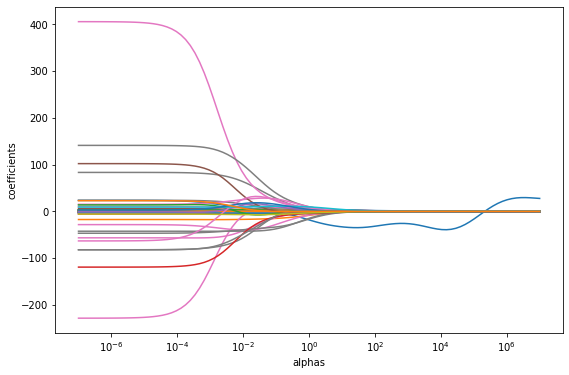

In [23]:
# Plot of coefficients vs. alphas

#fig,ax = plt.subplots(1) 

plt.figure(figsize=(20, 6))
plt.subplot(121)
ax = plt.gca()

coefficients=np.array(stored_weights)
coefficients = np.reshape(coefficients,(100,82))
alphas = np.reshape(alphas,(100,1))
ax.plot(alphas,coefficients)
plt.xscale("log")
#ax.set_xlim(ax.get_xlim()[::-1])
plt.xlabel('alphas')
plt.ylabel('coefficients')
plt.show()

Why are the values of the weights largest on the left? Do they all change monotonically? 

YOUR ANSWER HERE:

For small alphas, the weights are the largest. For big alphas, the weights converge to zero which leads to a simpler and biased solution.

Yes, they all change monotonically.

Plot how the performance (i.e. the error) changes as a function of $\alpha$. As a sanity check, the MSE value for very small $\alpha$s should be close to the test-set MSE of the unregularized solution, i.e. 599.

Text(0, 0.5, 'MSE')

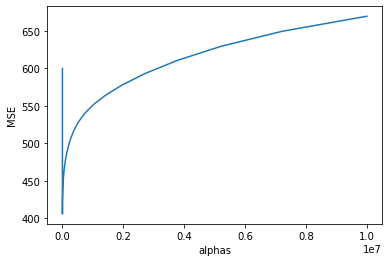

In [24]:
# Plot of MSE  vs. alphas
fig,ax = plt.subplots(1)
ax.plot(alphas,stored_errors)
plt.xlabel('alphas')
plt.ylabel('MSE')

In [25]:
alphas = np.reshape(alphas,100)
for i in alphas:
    w,p=ridge_regression(X_test, X_train, y_train, i)    
    mse=mean_squared_error(y_test, p)
    stored_weights.append(w)
    stored_errors.append(mse)
    if mse == min(stored_errors):
        print(i)
        print(mse)

298.3647240283334
405.6778354238627


Which value of $\alpha$ gives the minimum MSE? Is it better than the unregularized model? Why should the curve reach ~600 on the left?

YOUR ANSWER HERE:

When α = 298.3647240283334, it gives the minimum value of the MSE which is 405.67783540605797.

Now implement the same model using sklearn. Use the `linear_model.Ridge` object to do so.


In [26]:
def ridge_regression_sklearn(X_test, X_train, y_train,alpha):
    '''Computes OLS weights for regularized linear regression with regularization strength alpha using the sklearn
       library on the training set and returns weights and testset predictions.
    
       Inputs:
         X_test: (n_observations, 81), numpy array with predictor values of the test set 
         X_train: (n_observations, 81), numpy array with predictor values of the training set
         y_train: (n_observations,) numpy array with true target values for the training set
         alpha: scalar, regularization strength
         
       Outputs:
         weights: The weight vector for the regerssion model including the offset
         y_pred: The predictions on the TEST set
          
       Note:
         The sklearn library automatically takes care of adding a column for the offset.     
   
    
    '''
    
    # ---------------- INSERT CODE ----------------------
    clf = Ridge(alpha)
    clf.fit(X_train, y_train)
    weights=clf.coef_
    y_pred=clf.predict(X_test)   
      
    # ---------------- END CODE -------------------------
            
    return weights, y_pred
ridge_regression_sklearn(X_test, X_train, y_train,1.0)

(array([[-8.51357416e+00,  2.99038057e+00, -3.29671472e+00,
         -2.83654227e+00,  3.26695985e+00, -1.34639478e+00,
          4.76968196e+00,  1.07966945e-01,  1.35918824e-02,
         -1.17580520e+00,  1.31716309e+00, -2.05407425e+00,
          2.21365972e+00,  2.03341868e+00, -2.16721696e+00,
          5.94268568e+00,  9.71033173e+00,  2.97551879e-01,
          8.22043668e-03, -1.25175449e-01, -6.17651587e-01,
          7.94566987e-01, -1.65752924e+00, -9.88493146e-01,
          2.02620862e+00,  3.83431031e+00,  1.75369516e+00,
         -6.62920344e-01, -2.75653881e-01,  1.28274027e+00,
          5.71853011e-01, -5.67952708e-03,  2.80152125e-03,
          5.47625453e-03, -4.12221085e-03, -8.03795603e+00,
         -1.64874165e+01,  2.59820580e-04,  1.27283687e-03,
          5.85411537e-03, -8.69222488e-03, -8.10327360e-01,
          1.55911304e+00,  5.71376534e-01, -1.32612020e+00,
          3.73243534e+00,  6.73327319e+00, -6.07123482e-01,
         -3.69388747e-01,  1.99541549e+0

This time, only plot how the performance changes as a function of $\alpha$. 

Text(0, 0.5, 'MSE')

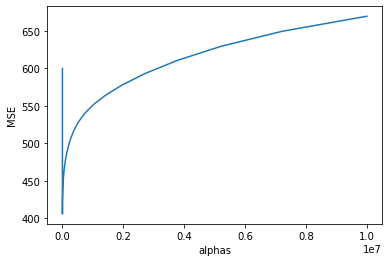

In [27]:
# Plot of MSE  vs. alphas
stored_errors2=[]
for i in alphas:   
    w,p=ridge_regression_sklearn(X_test, X_train, y_train, i)    
    mse=mean_squared_error(y_test, p)
    stored_errors2.append(mse)
    
fig,ax = plt.subplots(1)
ax.plot(alphas,stored_errors2)
plt.xlabel('alphas')
plt.ylabel('MSE')

Note: Don't worry if the curve is not exactly identical to the one you got above. The loss function we wrote down in the lecture  has $\alpha$ defined a bit differently compared to sklearn. However, qualitatively it should look the same.

## Task 5: Cross-validation

Until now, we always estimated the error on the test set directly. However, we typically do not want to tune hyperparameters of our inference algorithms like $\alpha$ on the test set, as this may lead to overfitting. Therefore, we tune them on the training set using cross-validation. As discussed in the lecture, the training data is here split in `n_folds`-ways, where each of the folds serves as a held-out dataset in turn and the model is always trained on the remaining data. Implement a function that performs cross-validation for the ridge regression parameter $\alpha$. You can reuse functions written above.

In [28]:
from sklearn.linear_model import RidgeCV
def ridgeCV(X, y, n_folds, alphas):
    '''Runs a n_fold-crossvalidation over the ridge regression parameter alpha. 
       The function should train the linear regression model for each fold on all values of alpha.
    
      Inputs: 
        X: (n_obs, n_features) numpy array - predictor
        y: (n_obs,) numpy array - target
        n_folds: integer - number of CV folds
        alphas: (n_parameters,) - regularization strength parameters to CV over
        
      Outputs:
        cv_results_mse: (n_folds, len(alphas)) numpy array, MSE for each cross-validation fold 
        
      Note: 
        Fix the seed for reproducibility.
        
        '''    
    
    cv_results_mse = np.zeros((n_folds, len(alphas)))
    np.random.seed(seed=2)

    
    # ---------------- INSERT CODE ----------------------
    clf2 = RidgeCV(alphas,cv=None,store_cv_values=True).fit(X, y)
    cv_results_mse=clf2.cv_values_
    
    # ---------------- END CODE -------------------------
            
    return cv_results_mse  
ridgeCV(X_train, y_train, n_folds=10, alphas=alphas)

array([[[9.44497100e+02, 9.44490150e+02, 9.44480527e+02, ...,
         7.14553721e-01, 3.25304043e+00, 7.63232517e+00]],

       [[1.44824039e+02, 1.44821320e+02, 1.44817554e+02, ...,
         1.90029029e+02, 1.42524479e+02, 1.05734960e+02]],

       [[6.48177820e+02, 6.48166178e+02, 6.48150055e+02, ...,
         7.32104907e+02, 7.91052084e+02, 8.40277075e+02]],

       ...,

       [[8.55972823e+02, 8.55974722e+02, 8.55977353e+02, ...,
         2.91436092e+02, 2.80928933e+02, 2.70376074e+02]],

       [[4.11665618e+02, 4.11667003e+02, 4.11668920e+02, ...,
         1.58074273e+03, 1.66983503e+03, 1.76232499e+03]],

       [[7.81772637e+00, 7.81815409e+00, 7.81874642e+00, ...,
         1.50169742e+01, 9.37735503e+00, 5.63492482e+00]]])

Now we run 10-fold cross-validation using the training data of a range of $\alpha$s.

In [29]:
alphas = np.logspace(-7,7,100)
mse_cv = ridgeCV(X_train, y_train, n_folds=10, alphas=alphas)
mse_cv=np.reshape(mse_cv,(200,100))

We plot the MSE trace for each fold separately:

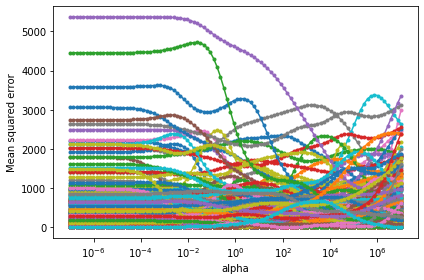

In [30]:
plt.figure(figsize=(6,4))
plt.plot(alphas, mse_cv.T, '.-')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Mean squared error')
plt.tight_layout()

We also plot the average across folds:

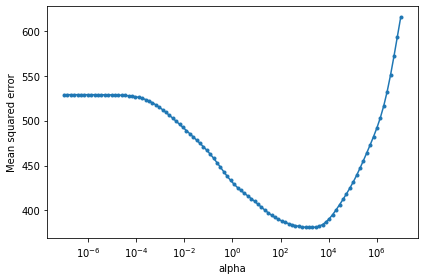

In [31]:
plt.figure(figsize=(6,4))
plt.plot(alphas, np.mean(mse_cv,axis=0), '.-')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Mean squared error')
plt.tight_layout()

In [32]:
ridgecv = RidgeCV(alphas = alphas, normalize = True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

0.03274549162877725

In [33]:
ridge_new = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge_new.fit(X_train, y_train)
mean_squared_error(y_test, ridge_new.predict(X_test))

423.61819544343774

What is the optimal $\alpha$? Is it similar to the one found on the test set? Do the cross-validation MSE and the test-set MSE match well or differ strongly?

YOUR ANSWER HERE:

The optimal $\alpha$ is 1519.91 (normalized: 0.0327) and therefore not similar to the one found on the test set. The cross-validation MSE is only a little bit higher.

We will now run cross-validation on the full training data. This will take a moment, depending on the speed of your computer. Afterwards, we will again plot the mean CV curves for the full data set (blue) and the small data set (orange).

In [34]:
alphas = np.logspace(-7,7,100)
mse_cv_full = ridgeCV(X_train_full, y_train_full, n_folds=10, alphas=alphas)
mse_cv_full=np.reshape(mse_cv_full,(20763,100))
mse_cv=np.reshape(mse_cv,(200,100))

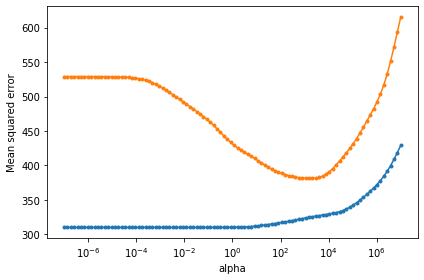

In [35]:
plt.figure(figsize=(6,4))
plt.plot(alphas, np.mean(mse_cv_full,axis=0), '.-')
plt.plot(alphas, np.mean(mse_cv,axis=0), '.-')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Mean squared error')
plt.tight_layout()

We zoom in on the blue curve to the very right:

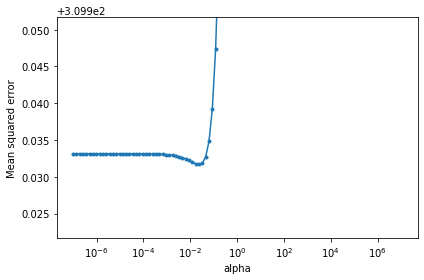

In [36]:
plt.figure(figsize=(6,4))
plt.plot(alphas, np.mean(mse_cv_full,axis=0), '.-')
plt.xscale('log')
minValue = np.min(np.mean(mse_cv_full,axis=0))
plt.ylim([minValue-.01, minValue+.02])
plt.xlabel('alpha')
plt.ylabel('Mean squared error')
plt.tight_layout()

In [37]:
ridgecv = RidgeCV(alphas = alphas, normalize=True)
ridgecv.fit(X_train_full, y_train_full)
ridgecv.alpha_

2.5950242113997373e-06

Why does the CV curve on the full data set look so different? What is the optimal value of $\alpha$ and why is it so much smaller than on the small training set?

YOUR ANSWER HERE: 

The optimal value of $\alpha$ is 0.0236 (normalized: 0.000002595). It is so much smaller because we used more data to train and therefore the model is better.